In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [3]:
# Read in csv file
ucas_df = pd.read_csv('UCAS Conservatoire October deadline - Age by domicile gender and level of study.csv', encoding='utf-8')
ucas_df.head()

,Year,Age,Domicile,Gender,Level of study,Applicants
0,2016,All,All,All,All,3150
1,2017,All,All,All,All,2010
2,2018,All,All,All,All,2420
3,2019,All,All,All,All,3540
4,2020,All,All,All,All,3760


In [4]:
# Check that types are correct
ucas_df.dtypes

# All types are correct

Year               int64
Age               object
Domicile          object
Gender            object
Level of study    object
Applicants         int64
dtype: object

Year              0
Age               0
Domicile          0
Gender            0
Level of study    0
Applicants        0
dtype: int64


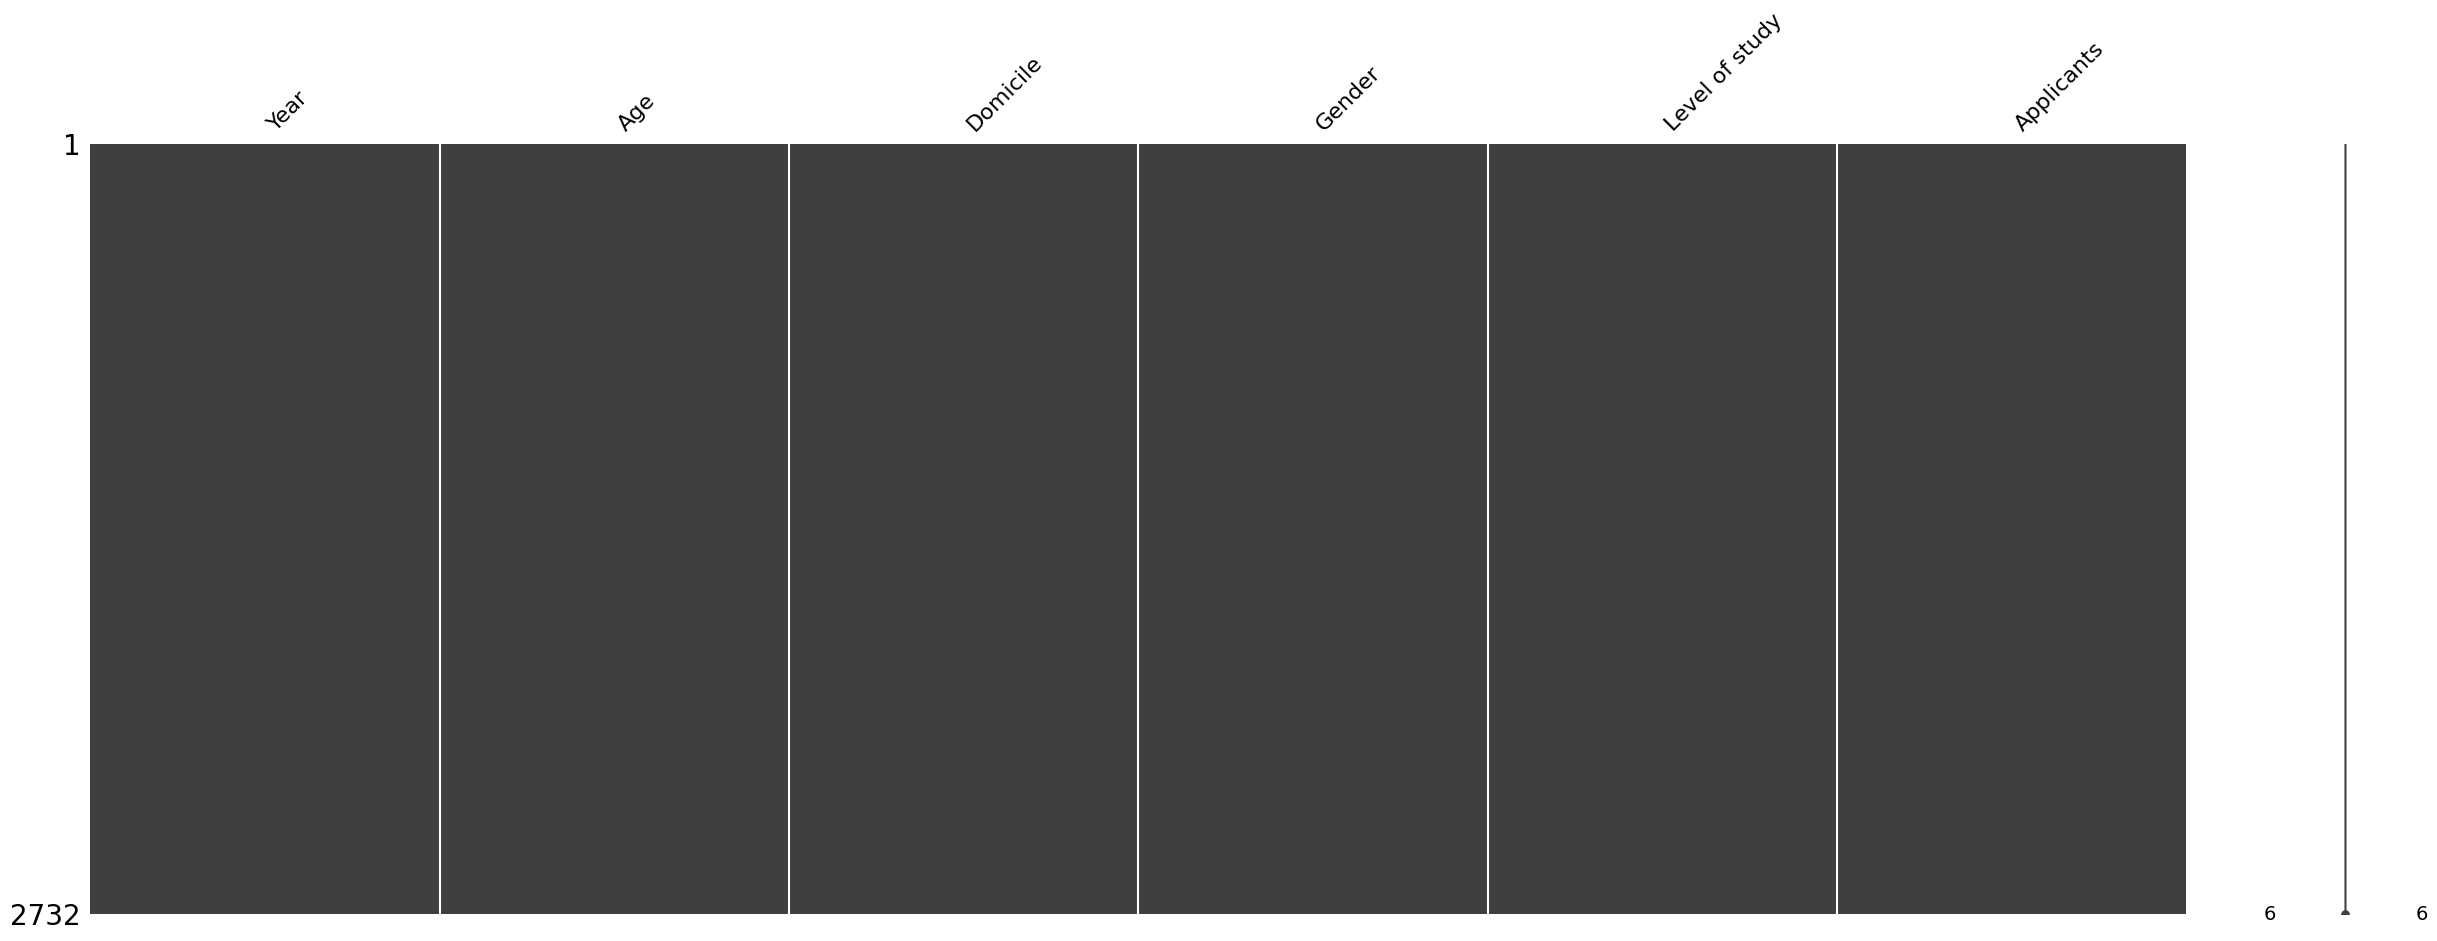

In [5]:
# Check if data is missing
missingno.matrix(ucas_df, figsize = (30,10))

print(ucas_df.isnull().sum())

# No data is missing

In [6]:
# check how many unique values are in each column
ucas_df.nunique()

Year                8
Age                 9
Domicile            7
Gender              3
Level of study      4
Applicants        156
dtype: int64

In [7]:
# check that there are no inconsistencies in the spelling of the values

age_values = ucas_df['Age'].unique()
age_values.sort()
print(age_values)

domicile_values = ucas_df['Domicile'].unique()
domicile_values.sort()
print(domicile_values)

study_level_values = ucas_df['Level of study'].unique()
study_level_values.sort()
print(study_level_values)

['17 and under' '18' '19' '20' '21-24' '25-29' '30-34' '35 and over' 'All']
['All' 'EU (excluding UK)' 'England' 'Northern Ireland' 'Not EU'
 'Scotland' 'Wales']
['All' 'Combination' 'Postgraduate only' 'Undergraduate only']


<AxesSubplot: xlabel='Year', ylabel='Applicants'>

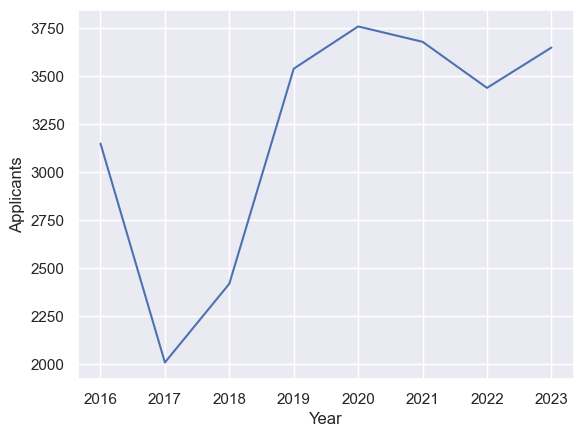

In [8]:
# What happens to the number of applicants over the years?

ucas_df_all = ucas_df[(ucas_df.Age == 'All') & (ucas_df.Domicile == 'All') & (ucas_df.Gender == 'All') & (ucas_df['Level of study'] == 'All')] 

# set seaborn style
sns.set_theme()

sns.lineplot(data=ucas_df_all, x='Year', y='Applicants')

# There was a big drop in applicants in 2017 however this rose to the peak number of applicants in 2020 and stayed higher since then

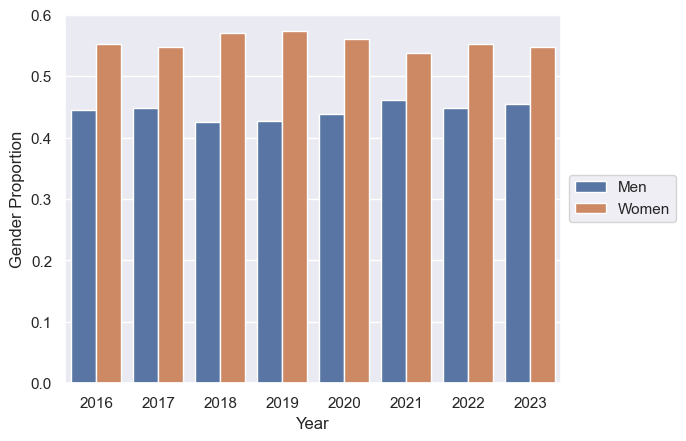

In [10]:
# What happens to the proportion of men and woman over the years?

# Add Total Applicants column
ucas_df_gender = (ucas_df[(ucas_df.Age == 'All') & (ucas_df.Domicile == 'All') & (ucas_df.Gender != 'All') & (ucas_df['Level of study'] == 'All')]).copy().reset_index() 
ucas_df_all = ucas_df[(ucas_df.Age == 'All') & (ucas_df.Domicile == 'All') & (ucas_df.Gender == 'All') & (ucas_df['Level of study'] == 'All')] 

total_applicants= []

for j in range(len(ucas_df_all)):
    for i in range(len(ucas_df_gender)):
        if ucas_df_gender['Year'][i] == ucas_df_all['Year'][j]:
            total_applicants.append(ucas_df_all['Applicants'][j])

ucas_df_gender['Total Applicants']= total_applicants

# Add propotion column
ucas_df_gender['Gender Proportion'] = ucas_df_gender['Applicants'] / ucas_df_gender['Total Applicants']    

# Graph
# set seaborn style
sns.set_theme()

sns.barplot(data=ucas_df_gender, x='Year', y='Gender Proportion', hue='Gender')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# The proportion of men is smaller than woman. The gap between the two is largest in 2018.

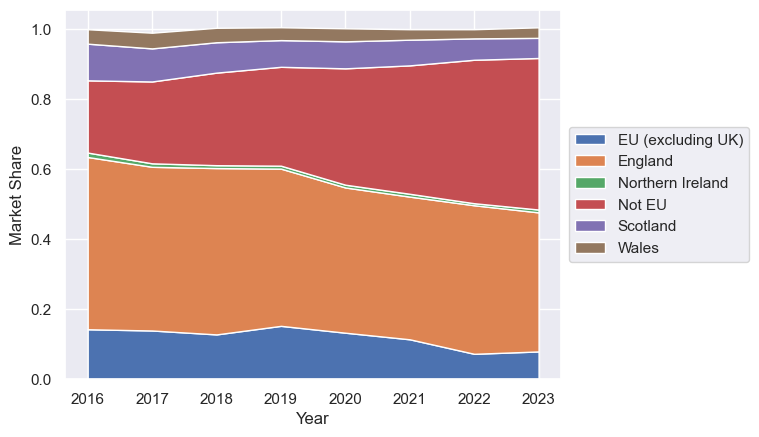

In [81]:
# How does the market share of each domicile group change over the years?

# Add Total Applicants column
ucas_df_domicile = (ucas_df[(ucas_df.Age == 'All') & (ucas_df.Domicile != 'All') & (ucas_df.Gender == 'All') & (ucas_df['Level of study'] == 'All')]).copy().reset_index()
ucas_df_all = ucas_df[(ucas_df.Age == 'All') & (ucas_df.Domicile == 'All') & (ucas_df.Gender == 'All') & (ucas_df['Level of study'] == 'All')] 

total_applicants= []

for j in range(len(ucas_df_all)):
    for i in range(len(ucas_df_domicile)):
        if ucas_df_domicile['Year'][i] == ucas_df_all['Year'][j]:
            total_applicants.append(ucas_df_all['Applicants'][j])

ucas_df_domicile['Total Applicants']= total_applicants

# Add propotion column
ucas_df_domicile['Market Share'] = ucas_df_domicile['Applicants'] / ucas_df_domicile['Total Applicants']    

# Graph

# set seaborn style
sns.set_theme()

# Generate arrays
eu = []
england = []
northern_ireland = []
not_eu = []
scotland = []
wales = []
year = []

for i in range(len(ucas_df_domicile)):
    if ucas_df_domicile['Domicile'][i] == 'EU (excluding UK)':
        eu.append(ucas_df_domicile['Market Share'][i])
    elif ucas_df_domicile['Domicile'][i] == 'England':
        england.append(ucas_df_domicile['Market Share'][i])
    elif ucas_df_domicile['Domicile'][i] == 'Northern Ireland':
        northern_ireland.append(ucas_df_domicile['Market Share'][i])
    elif ucas_df_domicile['Domicile'][i] == 'Not EU':
        not_eu.append(ucas_df_domicile['Market Share'][i])
    elif ucas_df_domicile['Domicile'][i] == 'Scotland':
        scotland.append(ucas_df_domicile['Market Share'][i])
    elif ucas_df_domicile['Domicile'][i] == 'Wales':
        wales.append(ucas_df_domicile['Market Share'][i])
        
for i in range(len(ucas_df_domicile)):
    year.append(ucas_df_domicile['Year'][i])
    
year = list(set(year))

# Creating the stacked area
y = np.row_stack((eu, england, northern_ireland, not_eu, scotland, wales))
x = year

plt.stackplot(x, y, labels=['EU (excluding UK)', 'England', 'Northern Ireland', 'Not EU', 'Scotland', 'Wales'])
plt.xlabel("Year")
plt.ylabel("Market Share")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# From the graph it can be seen that the market share of Not EU applicants increases whereas the market share of England applicants decreases.

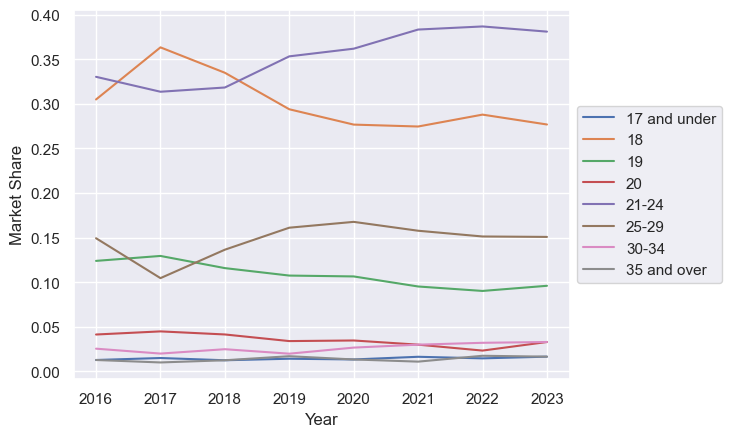

In [128]:
# How does the market share of each age group change over the years?

# Add Total Applicants column
ucas_df_age = (ucas_df[(ucas_df.Age != 'All') & (ucas_df.Domicile == 'All') & (ucas_df.Gender == 'All') & (ucas_df['Level of study'] == 'All')]).copy().reset_index()
ucas_df_all = ucas_df[(ucas_df.Age == 'All') & (ucas_df.Domicile == 'All') & (ucas_df.Gender == 'All') & (ucas_df['Level of study'] == 'All')] 

total_applicants= []

for j in range(len(ucas_df_all)):
    for i in range(len(ucas_df_age)):
        if ucas_df_age['Year'][i] == ucas_df_all['Year'][j]:
            total_applicants.append(ucas_df_all['Applicants'][j])

ucas_df_age['Total Applicants']= total_applicants

# Add propotion column
ucas_df_age['Market Share'] = ucas_df_age['Applicants'] / ucas_df_age['Total Applicants']    

# Graph
sns.lineplot(data=ucas_df_age, x='Year', y='Market Share', hue='Age')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# It can be seen from the graph that the market is currently mostly made up of 21-24 year olds with 18 year olds losing the top market share in 2018 and has been slowly descreasing ever since.

<AxesSubplot: xlabel='Age', ylabel='Gender Proportion'>

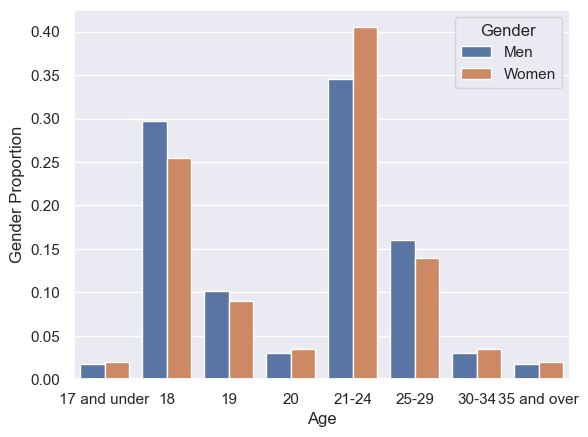

In [124]:
# In 2023, on average, which gender's applicants were older?

# Add Total Gender column
ucas_df_men_age = (ucas_df[(ucas_df.Age != 'All') & (ucas_df.Domicile == 'All') & (ucas_df.Gender == 'Men') & (ucas_df['Level of study'] == 'All') & (ucas_df['Year'] == 2023)]).copy().reset_index()
ucas_df_women_age = (ucas_df[(ucas_df.Age != 'All') & (ucas_df.Domicile == 'All') & (ucas_df.Gender == 'Women') & (ucas_df['Level of study'] == 'All') & (ucas_df['Year'] == 2023)]).copy().reset_index()

total_men = 0
total_women = 0

for i in range(len(ucas_df_men_age)):
    total_men += ucas_df_men_age['Applicants'][i]

for i in range(len(ucas_df_women_age)):
    total_women += ucas_df_women_age['Applicants'][i]

ucas_df_men_age['Total Applicants'] = total_men
ucas_df_women_age['Total Applicants'] = total_women

ucas_df_men_age['Gender Proportion'] = ucas_df_men_age['Applicants'] / ucas_df_men_age['Total Applicants']
ucas_df_women_age['Gender Proportion'] = ucas_df_women_age['Applicants'] / ucas_df_women_age['Total Applicants']

# Graph

ucas_df_gender_age = pd.concat([ucas_df_men_age, ucas_df_women_age], ignore_index=True)
        
sns.barplot(data=ucas_df_gender_age, x='Age', y='Gender Proportion', hue='Gender')

# It can be seen that the Women gender proportions is skewed more towards the older age groups than the Men's meaning that, on average, women applicants were older than men applicants.